<a href="https://colab.research.google.com/github/shivangibithel/IRMiDis_Task2/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Transformer and imports

In [1]:
pip install transformers

     |████████████████████████████████| 2.3MB 28.7MB/s 
     |████████████████████████████████| 901kB 41.5MB/s 
     |████████████████████████████████| 3.3MB 46.2MB/s 


In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import math
import seaborn as sn
import tensorflow as tf
import tensorflow_datasets as tfds
from bs4 import BeautifulSoup
from sklearn import metrics as sk_metrics
import nltk
import re

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
# folder = '/content/gdrive/My Drive/corona-tweet-sent'
# train_f = 'Corona_NLP_train.csv'
# test_f = 'Corona_NLP_test.csv'

# df_train = pd.read_csv(os.path.join(folder, train_f), engine='python')
# df_test = pd.read_csv(os.path.join(folder, test_f), engine='python')

# Data read and split...for some accuracy numbers

In [4]:
our_data = pd.read_csv("irmidis-2021-task2-train.csv")
from sklearn.utils import shuffle
our_data = shuffle(our_data)
# df_train = pd.read_csv("irmidis-2021-task2-train.csv")
# df_test = pd.read_csv("irmidis-2021-task2-test.csv")
df_train = our_data[:2233]
df_test = our_data[2234:]

In [ ]:
col_list = ["id", "tweet", "label"]
our_data = pd.read_csv("resampled_data.csv", usecols=col_list)
from sklearn.utils import shuffle
# our_data = shuffle(our_data)
# df_train = pd.read_csv("irmidis-2021-task2-train.csv")
# df_test = pd.read_csv("irmidis-2021-task2-test.csv")
df_train = our_data
df_test = our_data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 125 to 1257
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2233 non-null   int64 
 1   tweet   2233 non-null   object
 2   label   2233 non-null   object
dtypes: int64(1), object(2)
memory usage: 69.8+ KB


In [6]:
df_train.label.value_counts()

Neutral    817
ProVax     777
AntiVax    639
Name: label, dtype: int64

In [7]:
our_data.label.value_counts()

Neutral    1010
ProVax      991
AntiVax     791
Name: label, dtype: int64

In [8]:
df_train.head()

,id,tweet,label
125,1326058668995964928,1 billion+ people in China and NO vaccine need...,AntiVax
1305,1325818857043451905,Go the the https://t.co/riwDWVQKs1 website... ...,AntiVax
506,1325670033243037696,@DrAngelaCDunn \n\nPlease consider:\nThe uber ...,Neutral
1649,1325825336601358339,Pfizer and BioNTech announce trial data showin...,ProVax
1423,1326180325941268488,Is anyone actually going to take this vaccine!...,AntiVax


In [9]:
df_train['tweet'].iloc[0]

'1 billion+ people in China and NO vaccine needed~AMAZxiNG!\n#vaccinenotneeded\nFu€king Joke!!! \n$$$$$$Drug companies!!!!\n#WTFU https://t.co/2WeNuDqlWI'

In [10]:
y_map = {
    'ProVax': 0, 
    'AntiVax': 1, 
    'Neutral': 2
}

df_train['Sentiment_Cat'] = df_train['label'].map(y_map)
df_test['Sentiment_Cat'] = df_test['label'].map(y_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Pre-processing

In [ ]:
# nltk.download('stopwords')
# stop_words = nltk.corpus.stopwords.words('english')

# def clean_text(data):
#     data = data.lower()
#     data = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', data)
#     data = re.sub(r'([^a-zA-Z\s])', '', data)
#     data = data.split()
#     temp = []
#     for i in data:
#         if i not in stop_words:
#             temp.append(i)
#     data = ' '.join(temp)
#     return data

# df_train['tweet_cleaned'] = df_train['tweet'].apply(clean_text)
# df_test['tweet_cleaned'] = df_test['tweet'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction import stop_words
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): #doc is a string of text
    # doc = doc.replace("@", " ")
    # doc = doc.replace(" ", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # doc = " ".join([token for token in doc.split() if token not in stopwords])
    #remove punctuation and numbers
    return doc

In [13]:
import string
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_url(data):
  url = re.compile("http[s]?\:\/\/.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+", re.UNICODE)
  return re.sub(url, '', data)

In [ ]:
def clean_text():
  df_train['tweet_cleaned'] = df_train['tweet'].apply(remove_url)
  df_train['tweet_cleaned'] = df_train['tweet_cleaned'].apply(clean)
  df_train['tweet_cleaned'] = df_train['tweet_cleaned'].apply(remove_emojis)
  df_test['tweet_cleaned'] = df_test['tweet'].apply(remove_url)
  df_test['tweet_cleaned'] = df_test['tweet_cleaned'].apply(clean)
  df_test['tweet_cleaned'] = df_test['tweet_cleaned'].apply(remove_emojis)

clean_text()
# df_train['tweet_cleaned'] = df_train['tweet'].apply(remove_url,clean,remove_emojis)
# df_test['tweet_cleaned'] = df_test['tweet'].apply(remove_url,clean,remove_emojis)
# for i in range(len(our_data)):
#   our_data.tweet.iloc[i] = remove_url(our_data.tweet.iloc[i])
#   our_data.tweet.iloc[i] = clean(our_data.tweet.iloc[i])
#   our_data.tweet.iloc[i] = remove_emojis(our_data.tweet.iloc[i])

In [16]:
x_train, y_train = df_train['tweet_cleaned'].values, np.array(df_train['Sentiment_Cat'], dtype=np.int64)
x_test, y_test = df_test['tweet_cleaned'].values, np.array(df_test['Sentiment_Cat'], dtype=np.int64)

# BERT

In [17]:
from tokenizers import BertWordPieceTokenizer
import transformers

In [18]:
# trying to incorporate covid-twitter-bert here
# from transformers import (
#    AutoConfig,
#    AutoTokenizer,
#    TFAutoModelForSequenceClassification,
#    AdamW,
#    glue_convert_examples_to_features
# )
# from transformers import AutoConfig, AutoModel
# import tensorflow as tf
# import tensorflow_datasets as tfds
# import json
# tokenizer = AutoTokenizer.from_pretrained("digitalepidemiologylab/covid-twitter-bert")
# model = AutoModel.from_pretrained("digitalepidemiologylab/covid-twitter-bert")

In [19]:
# First load the real tokenizer
# tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased' , lower=True)
tokenizer = transformers.BertTokenizerFast.from_pretrained('bert-base-uncased', lower=True)

# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')

# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [20]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=200):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [21]:
max_len=80

x_train_enc = fast_encode(x_train, fast_tokenizer, maxlen=max_len)
x_test_enc = fast_encode(x_test, fast_tokenizer, maxlen=max_len)

In [22]:
NUM_CLASSES = df_train['Sentiment_Cat'].nunique()

# bert_transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
# bert_transformer = transformers.TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=NUM_CLASSES)
bert_transformer = transformers.TFBertForSequenceClassification.from_pretrained('digitalepidemiologylab/covid-twitter-bert-v2', num_labels=NUM_CLASSES)
input = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
sequence_output = bert_transformer(input)[0]
# cls_token = sequence_output[:, 0, :]
# output = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(cls_token)

model = tf.keras.Model(inputs=input, outputs=sequence_output)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
tf_bert_for_sequence_classif TFSequenceClassifierOutpu 335144963 
Total params: 335,144,963
Trainable params: 335,144,963
Non-trainable params: 0
_________________________________________________________________


In [24]:
# call backs
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    x_train_enc,
    y_train,
    batch_size=16,
    validation_data=(x_test_enc, y_test),
    epochs=50,
    callbacks=[early_stop_callback])

Epoch 1/50
140/140 [==============================] - 153s 899ms/step - loss: 0.9717 - accuracy: 0.5016 - val_loss: 0.7530 - val_accuracy: 0.7097
Epoch 2/50
140/140 [==============================] - 122s 875ms/step - loss: 0.7204 - accuracy: 0.7197 - val_loss: 0.5340 - val_accuracy: 0.8405
Epoch 3/50
140/140 [==============================] - 122s 875ms/step - loss: 0.4787 - accuracy: 0.8486 - val_loss: 0.4793 - val_accuracy: 0.8405
Epoch 4/50
140/140 [==============================] - 122s 873ms/step - loss: 0.3327 - accuracy: 0.8948 - val_loss: 0.4384 - val_accuracy: 0.8405
Epoch 5/50
140/140 [==============================] - 122s 874ms/step - loss: 0.2181 - accuracy: 0.9346 - val_loss: 0.3756 - val_accuracy: 0.8781
Epoch 6/50
140/140 [==============================] - 122s 874ms/step - loss: 0.1476 - accuracy: 0.9579 - val_loss: 0.4153 - val_accuracy: 0.8620
Epoch 7/50
140/140 [==============================] - 122s 874ms/step - loss: 0.0963 - accuracy: 0.9745 - val_loss: 0.3745 -

# Prediction 

In [26]:
ypred = model.predict(x_test_enc)
# df_test['ypred'] = ypred
# df_test['ypred_cat'] = np.where(df_test['ypred']>=0.5, 1, 0)
df_test['ypred_cat'] = np.argmax(ypred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
np.argmax(ypred, axis=1)

array([0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1,

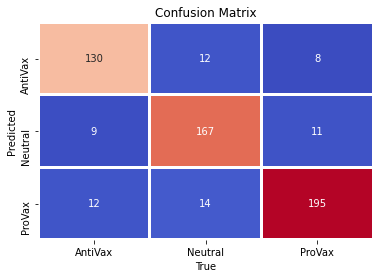

In [28]:
y_map_inv = {
    0: 'ProVax',
    1: 'AntiVax',
    2: 'Neutral'
}


sns.heatmap(
    pd.crosstab(df_test['ypred_cat'].map(y_map_inv), df_test['Sentiment_Cat'].map(y_map_inv)),
    annot=True,
    fmt='0.0f',
    cbar=False,
    linewidth=2,
    cmap='coolwarm'     
)

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix');

In [29]:
y_test = df_test['Sentiment_Cat'].map(y_map_inv)
y_pred = df_test['ypred_cat'].map(y_map_inv)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[130   9  12]
 [ 12 167  14]
 [  8  11 195]]

Accuracy: 0.88

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.88

Macro Precision: 0.88
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.88
Weighted Recall: 0.88
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

     Class 1       0.87      0.86      0.86       151
     Class 2       0.89      0.87      0.88       193
     Class 3       0.88      0.91      0.90       214

    accuracy                           0.88       558
   macro avg       0.88      0.88      0.88       558
weighted avg       0.88      0.88      0.88       558

